# Decision Tree :Income Prediction


In this case study will build a decision tree to predict the income of a given population..The income is labeled as <=50K or >50K.. 

## Understanding and Clearing data

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#to ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [89]:
df = pd.read_csv("adult_dataset.csv")
df.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [91]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [92]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


I can observe that the "workclass" and "occupation" columns contain missing value which are represented by "?".

If we observe more closely we can see that when the "workclass" data is missing "occupation" column also missing data in that row...

In [93]:
# rows with missing values

df_1 = df[df.workclass == "?"]
df_1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [94]:
print(df.shape)
print(df_1.shape)

(32561, 15)
(1836, 15)


Our original is length of 32561 and the length of missing data is 1836..The amount of missing data is approximately 5% of the total data..so we can drop the rows containing missing values..

In [95]:
#drop the missing values

df = df[df["workclass"] != "?"]
df.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


In [96]:
df.shape

(30725, 15)

In [97]:
# Lets check the numerical column with pandas..

for label,data in df.items():
    if pd.api.types.is_numeric_dtype(data):
        print(label)
    

age
fnlwgt
education.num
capital.gain
capital.loss
hours.per.week


In [98]:
#lets check the categorical columns and the missing values

for label,data in df.items():
    if  not pd.api.types.is_numeric_dtype(data):
        print(label)
        print(label,data.isna().sum(),"\n")

workclass
workclass 0 

education
education 0 

marital.status
marital.status 0 

occupation
occupation 0 

relationship
relationship 0 

race
race 0 

sex
sex 0 

native.country
native.country 0 

income
income 0 



In [99]:
# Lets check any columns contain any "?" string 

df_categorical = df.select_dtypes(include= ["object"])

df_categorical.apply(lambda x:x == "?",axis = 0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [100]:
df = df[df["occupation"] != "?"]
df = df[df["native.country"] != "?"]

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [102]:
#lets turn the categorical columns into numerical value though Decision Tree can compute with categorical data

for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int8 
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int8 
 4   education.num   30162 non-null  int64
 5   marital.status  30162 non-null  int8 
 6   occupation      30162 non-null  int8 
 7   relationship    30162 non-null  int8 
 8   race            30162 non-null  int8 
 9   sex             30162 non-null  int8 
 10  capital.gain    30162 non-null  int64
 11  capital.loss    30162 non-null  int64
 12  hours.per.week  30162 non-null  int64
 13  native.country  30162 non-null  int8 
 14  income          30162 non-null  int8 
dtypes: int64(6), int8(9)
memory usage: 1.9 MB


In [104]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [105]:
df.relationship.value_counts()

0    12463
1     7726
3     4466
4     3212
5     1406
2      889
Name: relationship, dtype: int64

In [106]:
df.income.value_counts()

0    22654
1     7508
Name: income, dtype: int64

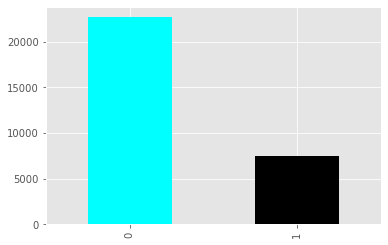

In [107]:
df.income.value_counts().plot(kind = "bar",color = ["cyan","black"])

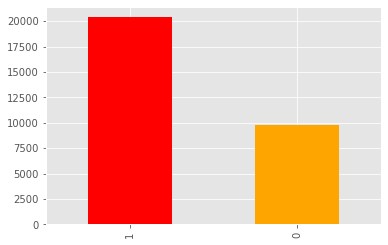

In [108]:
df.sex.value_counts().plot(kind = "bar",color = ["red","orange"])

In [109]:
pd.crosstab(df.sex,df.income)

income,0,1
sex,,
0,8670,1112
1,13984,6396


Text(0.5, 0, '0 = Female, 1 = Male')

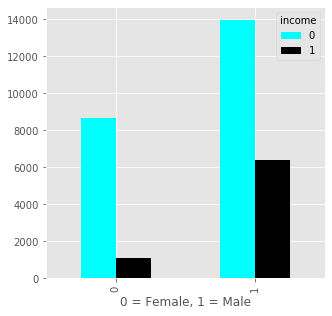

In [110]:
pd.crosstab(df.sex,df.income).plot(kind = "bar",figsize = (5,5),color = ["cyan","black"])
plt.xlabel("0 = Female, 1 = Male")

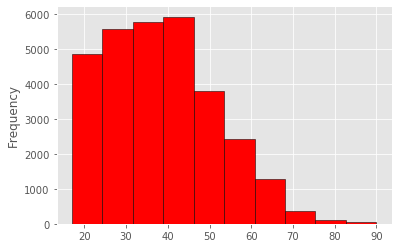

In [111]:
#check the age distribution
plt.style.use("ggplot")
df.age.plot.hist(color = "red",edgecolor = "black")

In [112]:
df.relationship.value_counts()

0    12463
1     7726
3     4466
4     3212
5     1406
2      889
Name: relationship, dtype: int64

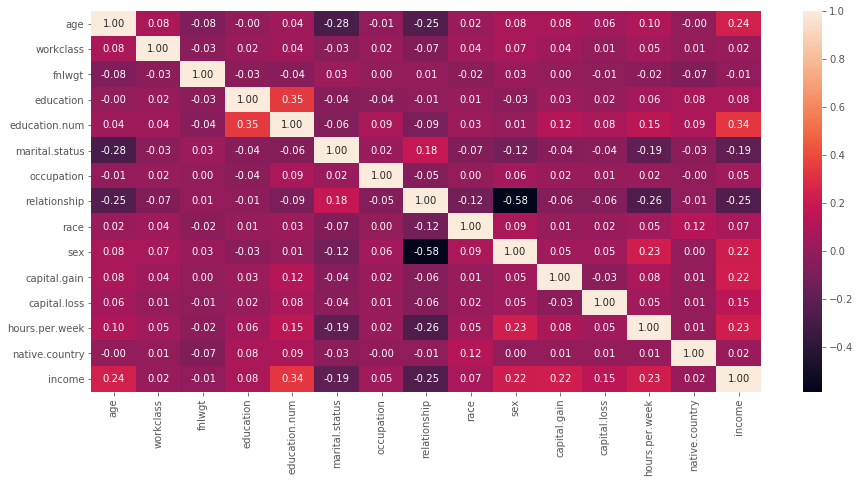

In [113]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),
            annot = True,
            fmt = ".2f")

## Model Building and Evaluation

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X = df.drop(["income"],axis = 1)
y = df["income"]

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 12)

In [117]:
from sklearn.tree import DecisionTreeClassifier

default_dt = DecisionTreeClassifier(max_depth = 5)
default_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [118]:
default_dt.score(X_test,y_test)

0.8493756216156482

In [119]:
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
y_pred_dt = default_dt.predict(X_test)

In [121]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6858
           1       0.78      0.52      0.63      2191

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [122]:
confusion_matrix(y_test,y_pred_dt)

array([[6540,  318],
       [1045, 1146]], dtype=int64)

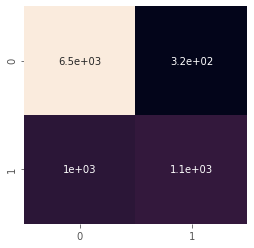

In [123]:
plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),
            annot = True,
            cbar = False)

## Tuning hyperparameter

In [124]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [125]:
param_grid = {"max_depth":range(5,15,5),
              "min_samples_leaf":range(50,150,50),
              "min_samples_split":range(50,150,50),
              "criterion":["entropy","gini"]}

In [126]:
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           cv = 5,
                           verbose = 2
                           )

In [127]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=50, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=50, min_samples_split=100, total=   0.1s
[CV] criterion=entropy

[CV]  criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=50, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=100, min_samples_split=100, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [128]:
scores = grid_search.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047573,0.001950,0.002604,0.000795,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.845844,0.839687,0.847502,0.842018,0.845334,0.844077,0.002826,13
1,0.050177,0.002931,0.002397,0.000486,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.845844,0.839687,0.847502,0.842018,0.845334,0.844077,0.002826,13
2,0.049979,0.002900,0.003188,0.001475,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.845607,0.839687,0.846791,0.842255,0.845334,0.843935,0.002599,15
3,0.047584,0.004665,0.002798,0.000399,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.845607,0.839687,0.846791,0.842255,0.845334,0.843935,0.002599,15
4,0.075963,0.008505,0.013390,0.022773,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.846318,0.845607,0.848686,0.844150,0.853387,0.847630,0.003231,9
5,0.072001,0.005020,0.002597,0.000487,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.846318,0.845607,0.848686,0.844150,0.853387,0.847630,0.003231,9
6,0.085646,0.013079,0.003409,0.001019,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.852238,0.846791,0.849633,0.840834,0.853150,0.848529,0.004440,5
7,0.079762,0.009983,0.003594,0.000797,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.852238,0.846791,0.849633,0.840834,0.853150,0.848529,0.004440,5
8,0.042033,0.003303,0.002403,0.000797,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.851764,0.845607,0.846555,0.843913,0.852676,0.848103,0.003479,7
9,0.041590,0.003260,0.002398,0.000488,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.851764,0.845607,0.846555,0.843913,0.852676,0.848103,0.003479,7


In [129]:
grid_search.best_score_

0.8490029505023864

In [130]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 50}

In [131]:
#build a model with best parameters

dt = DecisionTreeClassifier(criterion="gini",
                            max_depth=10,
                            min_samples_leaf=100,
                            min_samples_split=50)

dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [132]:
dt.score(X_test,y_test)

0.849486131064206

In [133]:
dt_1 = DecisionTreeClassifier(criterion="gini",
                            max_depth=15,
                            min_samples_leaf=100,
                            min_samples_split=50)

dt_1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [134]:
dt_1.score(X_test,y_test)

0.8504807161012267

In [135]:
y_pred = dt_1.predict(X_test)

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6858
           1       0.74      0.60      0.66      2191

    accuracy                           0.85      9049
   macro avg       0.81      0.76      0.78      9049
weighted avg       0.84      0.85      0.84      9049



In [137]:
confusion_matrix(y_test,y_pred)

array([[6386,  472],
       [ 881, 1310]], dtype=int64)

In [138]:
from sklearn.tree import export_graphviz

In [139]:
from sklearn.externals.six import StringIO

In [140]:
from IPython.display import Image

In [141]:
import graphviz,pydotplus

In [152]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/ROBIN/.conda/pkgs'

In [153]:
features = list(df.columns[1:])
features

['workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

In [155]:
#plotting tree with default max_depth

dot_data = StringIO()
export_graphviz(default_dt,out_file = dot_data,
                feature_names = features,filled = True,rounded = True)

graphs = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graphs.create_png())

In [146]:
graphviz.__version__

'0.16'